In [49]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_style('whitegrid')
%matplotlib inline

from pandas import Series,DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

Text(0.5, 1.0, 'Logistic Function')

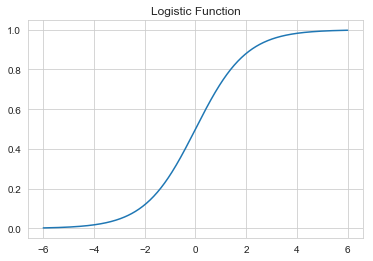

In [4]:
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t))

t = np.linspace(-6,6,500)

y = np.array([logistic(x) for x in t])

plt.plot(t,y)
plt.title("Logistic Function")

In [6]:
df = sm.datasets.fair.load_pandas().data

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [8]:
def check(x):
    if x != 0:
        return 1
    else:
        return 0

In [10]:
df['Had_Affair'] = df['affairs'].apply(check)

In [11]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [12]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


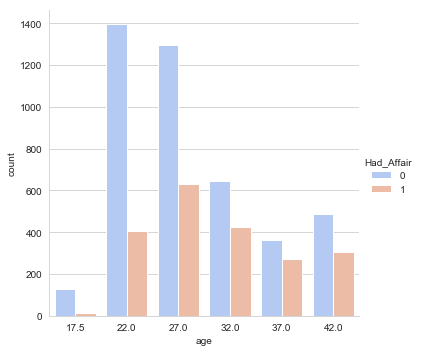

In [18]:
sns.catplot(x='age',data=df,hue='Had_Affair',palette='coolwarm',kind='count') #factorplot has been deprecated

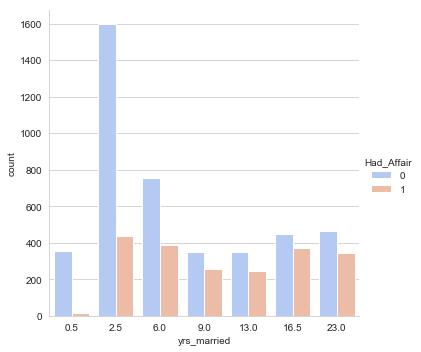

In [19]:
sns.catplot(x='yrs_married',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

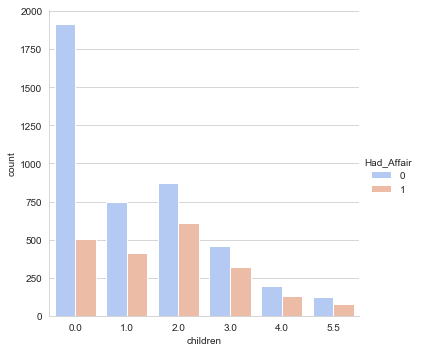

In [20]:
sns.catplot(x='children',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

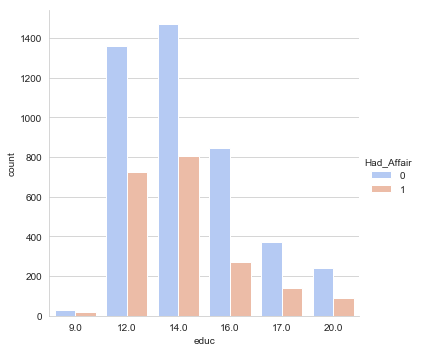

In [21]:
sns.catplot(x='educ',data=df,hue='Had_Affair',palette='coolwarm',kind='count')

In [28]:
occ_dummies = pd.get_dummies(df['occupation'],prefix='occ')

In [31]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'],prefix='hocc')

In [30]:
occ_dummies.head()

,occ_1.0,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [32]:
hus_occ_dummies.head()

,hocc_1.0,hocc_2.0,hocc_3.0,hocc_4.0,hocc_5.0,hocc_6.0
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,1,0,0


In [33]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [34]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [35]:
dummies.head()

,occ_1.0,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0,hocc_1.0,hocc_2.0,hocc_3.0,hocc_4.0,hocc_5.0,hocc_6.0
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [36]:
X = pd.concat([X,dummies],axis=1)

In [37]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ_1.0,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0,hocc_1.0,hocc_2.0,hocc_3.0,hocc_4.0,hocc_5.0,hocc_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [38]:
Y = df['Had_Affair']

In [41]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64

In [42]:
X = X.drop('occ_1.0',axis=1)
X = X.drop('hocc_1.0',axis=1)

In [43]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0,hocc_2.0,hocc_3.0,hocc_4.0,hocc_5.0,hocc_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,1,0,0,0,0,0,1,0,0


In [44]:
X.drop('affairs',axis=1,inplace=True)

In [45]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ_2.0,occ_3.0,occ_4.0,occ_5.0,occ_6.0,hocc_2.0,hocc_3.0,hocc_4.0,hocc_5.0,hocc_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [47]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [51]:
logm = LogisticRegression()

logm.fit(X,Y)

logm.score(X,Y)

C:\Users\Hersh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [52]:
Y.mean()

0.3224945020420987

In [53]:
df_coeff = DataFrame(zip(X.columns,np.transpose(logm.coef_)))

In [54]:
df_coeff

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ_2.0,[0.2979785839591037]
7,occ_3.0,[0.6079160723958301]
8,occ_4.0,[0.34603776729459984]
9,occ_5.0,[0.9423651396317297]


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [56]:
logm2 = LogisticRegression()

logm2.fit(X_train,Y_train)

C:\Users\Hersh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
class_predict = logm2.predict(X_test)

In [58]:
print(metrics.accuracy_score(Y_test,class_predict))

0.7129396984924623
